<a href="https://colab.research.google.com/github/GoKarolis/ML_training_project/blob/main/kg_red_wine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality 


---


by GoKarolis






***Inspiration:***

To use machine learning to determine which physiochemical properties make a wine 'good'!


***Raw dataset can be found here:***

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Init

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# wine_data == data
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/winequality-red.csv')

# **1. Exploratory data analysis**

# 1.1. Shape

In [44]:
data.shape

(1599, 12)

# 1.2. Descriptive statistics

In [45]:
data.isnull().sum()

#data.isna().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [47]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
def display_all(data):
    with pd.option_context("display.max_rows", 10000, "display.max_columns", 10000): 
        display(data)

display_all(data.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# 1.3. Data types and more information about the data

In [49]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


sns.set_palette("Set2")

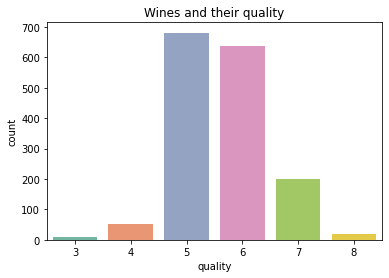

In [51]:
plt.title('Wines and their quality')

sns.countplot(data['quality'])
plt.show()


In [52]:
data['quality'].value_counts().sort_index(ascending=False)

8     18
7    199
6    638
5    681
4     53
3     10
Name: quality, dtype: int64

# **2. Feature engineering**

# **3. Feature pre-processing**

In [53]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [54]:
label_quality = LabelEncoder()

data['quality'] = label_quality.fit_transform(data['quality'])

X = data.drop('quality', axis = 1)
y = data['quality']


# **4. Building machine learning model**

# Train test split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
"""def split_vals(a,n): return a[:n], a[n:]
n_valid = 200
n_trn = len(data)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)"""

'def split_vals(a,n): return a[:n], a[n:]\nn_valid = 200\nn_trn = len(data)-n_valid\nX_train, X_valid = split_vals(df_trn, n_trn)\ny_train, y_valid = split_vals(y_trn, n_trn)\nraw_train, raw_valid = split_vals(df_raw, n_trn)'

**Out-of-bag score**

In [57]:
"""y = data.quality
X = data
X_train,X_test,y_train,y_test = train_test_split(data.drop('quality',axis=1),data['quality'],test_size=0.25,random_state=42)


m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)"""

"y = data.quality\nX = data\nX_train,X_test,y_train,y_test = train_test_split(data.drop('quality',axis=1),data['quality'],test_size=0.25,random_state=42)\n\n\nm = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)\nm.fit(X_train, y_train)\nprint_score(m)"

In [58]:
"""valid_fraction = 0.1
valid_size = int(len(data) * valid_fraction)

x_train = data[:-2 * valid_size]
x_valid = data[-2 * valid_size:-valid_size]
x_test = data[-valid_size:]
"""

'valid_fraction = 0.1\nvalid_size = int(len(data) * valid_fraction)\n\nx_train = data[:-2 * valid_size]\nx_valid = data[-2 * valid_size:-valid_size]\nx_test = data[-valid_size:]\n'

In [59]:
"""X = data.drop('quality',axis=1)
y = data['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)"""

"X = data.drop('quality',axis=1)\ny = data['quality']\n\nX_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)"

# k-Nearest Neighbour

In [60]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320



# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.64      0.60      0.62        47

    accuracy                           0.89       320
   macro avg       0.78      0.77      0.78       320
weighted avg       0.89      0.89      0.89       320



# Random forest

In [62]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.75      0.57      0.65        47

    accuracy                           0.91       320
   macro avg       0.84      0.77      0.80       320
weighted avg       0.90      0.91      0.90       320



# Logistic regression

In [63]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# XGBOOST

Requirements
    Do exploratory data analysis.
    Do feature engineering.
    Do feature preprocessing.
    Build a machine learning model.
    Explore your model results.
Bonus Points
    Move your final model to a Python module.
    Compare multiple machine learning models.
    Do hyperparameter tuning.
    Deploy the model on your own machine.
    Deploy the model on external service.

In [64]:
xgb = XGBClassifier(max_depth=3,n_estimators=200,learning_rate=0.5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
# print(accuracy_score(y_test,y_pred))



rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.72      0.55      0.63        47

    accuracy                           0.90       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.90      0.90      0.90       320




b) get_dummies() - Converts categorical features into dummy variables. 

 

c) OneHotEncoder() - Array-like of integers or strings is the required input for this encoder. The features are encoded using a one-hot encoding scheme. The result is a binary column for each category and reverts a sparse matrix. 

 

 

9. Standardization of data 
 

Standardization of data is a major important step that is required for machine learning algorithms to give good results. There are different scaling functions present in the preprocessing module of sci-kit learn. If data is not scaled and is passed to the algorithm the result might be wrong due to wrongly distributed data.

 

Why is it important to scale the data?
 

It is usually seen that we ignore checking the shape of the distribution and change the data to be centered. That is done by removing the mean values of each column and then scaling it by dividing non-constant columns by their standard deviation.

 

Different functions that are used by algorithms to learn to assume that all the desired features are centered as zero and also their variance is in the same structure. If any of the features have a higher proportion than all other features it may dominate the function for learning algorithm and does not allow learning from other features as required. 

 

a) Scale :  present in the pre-processing module gives a fast and effective way to do this operation on a single array-like data:

 

Hand-on implementation of scaling using scale.

 

X_scaled has now unit variance and zero mean as you can see in the below image.

 

Scaled data has zero mean and unit variance.

 

b) The pre-processing module also has different other classes like StandardScaler that are used in scaling the data that is converting the mean to be zero and standard deviation to be unit on training data which can be further used in test data as well. Such class can also be used in building pipelines also.

 

The code implementation of standard scaler is shown below.

 

Code implementation of Standard scaler.

 

c) Scaling features to a range:  There are other methods also to scale data within a respective range that is a min values and max value. It mainly ranges between 0 and 1. You can use MinMaxScaler or MaxAbsScaler for scaling the data respectively.

 

d) Scaling sparse data: Centering the scatter data would result in knock-down of sparsity structure of data thus it is not advisable to do. MinMaxScaler and MaxAbs scaler were introduced to scale the sparse data. Scalar often accepts both CSR (Compressed Sparse Rows) & also CSC (Compressed Sparse Columns). If there is any other different sparse input then it is converted to Compressed Sparse Rows. To take care of the memory it is advisable to convert it in CSR and CSC representation.

 

e) Scaling data with presence of outliers : If the data has outliers in it then scaling that sort of data using mean and variance is not a good approach. You can use robust_scale & Robust_Scaler as drop in substitution.

 

10. Normalization of data 
 

It is the process of scaling each sample to have a unit standard. These types of techniques are much more effective if you are computing the similarity between different pairs of samples or to use a quadratic form like a dot product.This is the base of models used in text classifications. 

 

There is a function in the pre-processing module that is normalized which provides a good way to execute such operations on single array-like data by using l1 or l2 standards. Implementation of normalizing data using normalize is shown in the below image.

 

Code to normalize the data using Normalize function.

 

Pre-processing module also has another class that is called a normalizer that executes the similar operations using the transformer API. This class can also be used in the initial stage of pipeline. Implementation of normalizer is shown below in the image.

 

Code to normalize the data using normalizer function.

 

If you want to look for code implementation of EDA discussed above you can refer to the GitHub link here. It contains a jupyter file and both the datasets which are used. 
